In [2]:
import pandas as pd

In [11]:
df = pd.read_csv(r"../data/raw/retail_store_sales.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
#inital standart check - infor, describe, types, nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [6]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [7]:
df.dtypes

Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

In [8]:
# Notes to myself for data improvements
#**C** - marks column as critical for not nill
# Transaction ID       object **C** candidate PK
# Customer ID          object **C**
# Category             object
# Item                 object - nulls - 	Item_10_PAT no need of ITEM_ and stuff after the digit split po _ and take 1 - only item id bloats cardinality as category existist no actual value in before.after _
# Price Per Unit      float64 - nulls - no negative values
# Quantity            float64 - int - nulls no negative values
# Total Spent         float64 - nulls okay if qty * price available no negative values
# Payment Method       object
# Location             object
# Transaction Date     object - date
# Discount Applied     object -bool - nulls but okay
# dtype: object

In [9]:
df.isna().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [10]:
import seaborn

ModuleNotFoundError: No module named 'seaborn'

In [13]:
df[df["Price Per Unit"].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN
21,TXN_8685338,CUST_15,Milk Products,NaN,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN
32,TXN_1543244,CUST_20,Food,NaN,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True
...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,NaN,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True
12457,TXN_1352194,CUST_17,Electric household essentials,NaN,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN
12477,TXN_5625684,CUST_22,Computers and electric accessories,NaN,NaN,4.0,80.0,Cash,In-store,2022-11-09,True
12491,TXN_7894525,CUST_23,Butchers,NaN,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True


In [24]:
df[df["Quantity"].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN


In [15]:
df["Category"].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [19]:
#find unique entries  
# Payment Method array(['Digital Wallet', 'Credit Card', 'Cash'], dtype=object)
# Location array(['Online', 'In-store'], dtype=object)
# Discount Applied ([True, False, nan], dtype=object)
#data seems consistent in terms on unique entries
df["Item"].unique()

array(['Item_10_PAT', 'Item_17_MILK', 'Item_12_BUT', 'Item_16_BEV',
       'Item_6_FOOD', nan, 'Item_1_FOOD', 'Item_16_FUR', 'Item_22_BUT',
       'Item_3_BUT', 'Item_2_FOOD', 'Item_24_PAT', 'Item_16_MILK',
       'Item_17_PAT', 'Item_13_EHE', 'Item_7_BEV', 'Item_4_EHE',
       'Item_10_FOOD', 'Item_14_FUR', 'Item_20_BUT', 'Item_25_FUR',
       'Item_14_FOOD', 'Item_22_PAT', 'Item_11_FOOD', 'Item_6_PAT',
       'Item_21_EHE', 'Item_25_BEV', 'Item_23_FOOD', 'Item_10_FUR',
       'Item_11_BEV', 'Item_23_BUT', 'Item_22_BEV', 'Item_10_EHE',
       'Item_24_BUT', 'Item_8_BEV', 'Item_3_FOOD', 'Item_12_FOOD',
       'Item_16_CEA', 'Item_11_PAT', 'Item_16_BUT', 'Item_5_CEA',
       'Item_19_MILK', 'Item_23_FUR', 'Item_7_FUR', 'Item_15_CEA',
       'Item_6_MILK', 'Item_24_CEA', 'Item_22_CEA', 'Item_22_FOOD',
       'Item_2_BUT', 'Item_14_PAT', 'Item_12_PAT', 'Item_18_FOOD',
       'Item_1_PAT', 'Item_4_BEV', 'Item_22_FUR', 'Item_7_PAT',
       'Item_20_CEA', 'Item_20_FOOD', 'Item_11_FUR', 'Item

In [36]:
filter = (df["Item"].notna()) & (df["Category"] == "Patisserie")
filted = df[filter]
filted[filted["Item"] == "Item_10_PAT"]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
126,TXN_5243520,CUST_13,Patisserie,Item_10_PAT,18.5,5.0,92.5,Cash,In-store,2024-05-16,False
219,TXN_5846723,CUST_05,Patisserie,Item_10_PAT,18.5,3.0,55.5,Cash,In-store,2024-01-28,False
555,TXN_1099045,CUST_21,Patisserie,Item_10_PAT,18.5,6.0,111.0,Digital Wallet,Online,2022-09-12,NaN
1965,TXN_6812056,CUST_10,Patisserie,Item_10_PAT,18.5,10.0,185.0,Cash,In-store,2024-07-03,True
2667,TXN_2630677,CUST_05,Patisserie,Item_10_PAT,18.5,5.0,92.5,Cash,In-store,2022-04-27,True
2773,TXN_1532181,CUST_23,Patisserie,Item_10_PAT,18.5,2.0,37.0,Digital Wallet,In-store,2022-06-06,True
2925,TXN_2728490,CUST_25,Patisserie,Item_10_PAT,18.5,1.0,18.5,Credit Card,Online,2023-10-31,True
3009,TXN_3878663,CUST_11,Patisserie,Item_10_PAT,18.5,3.0,55.5,Digital Wallet,Online,2024-03-31,False
3153,TXN_4130715,CUST_08,Patisserie,Item_10_PAT,18.5,3.0,55.5,Credit Card,Online,2024-12-19,NaN


In [42]:
# checking for numberc values out of range
# Price Per Unit      float64 - nulls
# Quantity            float64 - int - nulls
# Total Spent         float64 - nulls okay if qty * price available

df[df["Price Per Unit"] < 1]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN
19,TXN_4206593,CUST_01,Furniture,NaN,35.0,NaN,NaN,Digital Wallet,Online,2025-01-13,False
25,TXN_3481599,CUST_05,Furniture,NaN,39.5,NaN,NaN,Cash,Online,2022-09-08,False
34,TXN_1621497,CUST_06,Patisserie,NaN,23.0,NaN,NaN,Cash,In-store,2023-02-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN


In [43]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 23.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]m7/8 [seaborn]ib]


In [74]:
 df["Item"].isna().sum()

np.int64(1213)

In [121]:
df['check_total_spent'] = df['Total Spent'] == df['Price Per Unit'] * df['Quantity']
df[df['check_total_spent']==False]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Is_Missing_Item,check_total_spent
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN,True,False
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True,True,False
11,TXN_5422631,CUST_09,Milk Products,NaN,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True,True,False
15,TXN_1809665,CUST_14,Beverages,NaN,24.5,NaN,NaN,Credit Card,In-store,2022-05-11,NaN,True,False
17,TXN_9634894,CUST_15,Milk Products,NaN,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12527,TXN_1069238,CUST_23,Food,NaN,5.0,NaN,NaN,Digital Wallet,In-store,2022-08-13,False,True,False
12552,TXN_4823896,CUST_05,Milk Products,NaN,8.0,NaN,NaN,Cash,In-store,2022-07-21,False,True,False
12556,TXN_4397672,CUST_04,Beverages,NaN,41.0,NaN,NaN,Credit Card,Online,2024-11-28,True,True,False
12562,TXN_7422454,CUST_07,Butchers,NaN,33.5,NaN,NaN,Cash,Online,2023-04-15,NaN,True,False


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Label', ylabel='Count'>

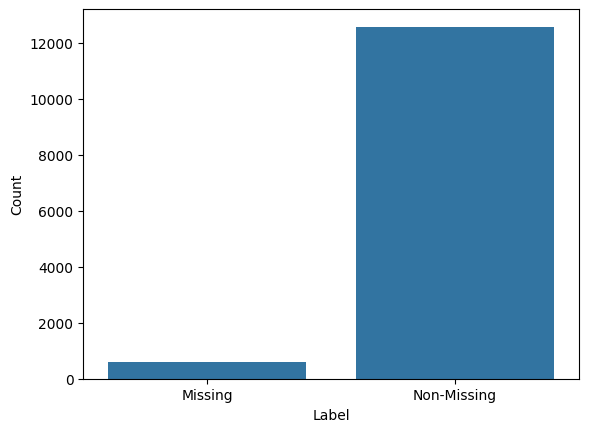

In [96]:
# some visuals for the numeric values
data_summary = pd.DataFrame({
    "Label": ["Missing", "Non-Missing"],
    "Count": [df["Quantity"].isna().sum(), (df["Quantity"] != "Nan").sum()]
})

sns.barplot(x="Label", y="Count", data=data_summary)

<Axes: xlabel='Price Per Unit', ylabel='Count'>

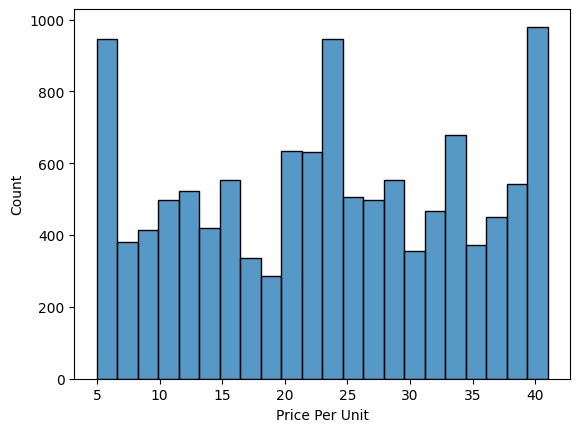

In [99]:
sns.histplot(data=df, x="Price Per Unit")

<Axes: xlabel='Total Spent', ylabel='Count'>

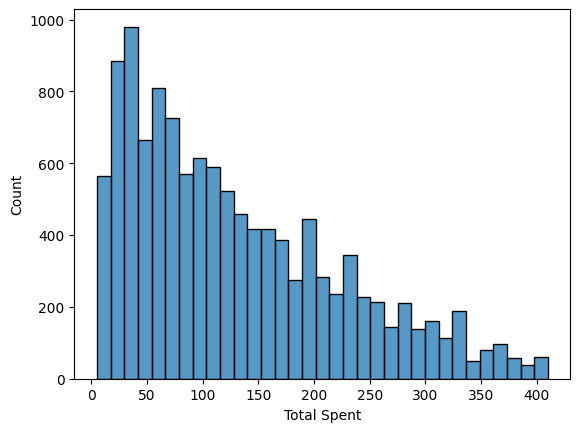

In [102]:
sns.histplot(data=df, x="Total Spent")


<Axes: xlabel='Quantity', ylabel='Count'>

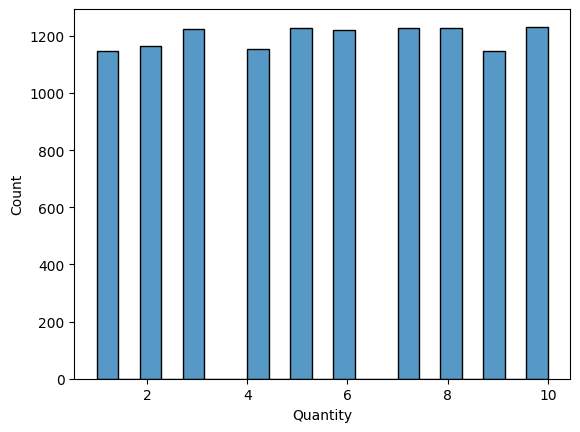

In [103]:
sns.histplot(data=df, x="Quantity")

In [104]:
df["Quantity"].value_counts().sort_index()

Quantity
1.0     1147
2.0     1164
3.0     1224
4.0     1155
5.0     1228
6.0     1220
7.0     1227
8.0     1226
9.0     1148
10.0    1232
Name: count, dtype: int64